In [1]:
import polars as pl
pl.Config.set_tbl_rows(50) 

polars.config.Config

In [2]:
df = pl.read_csv("ingested.csv")

In [3]:
df.head(2)

address,lease_remaining,minimum_floor,maximum_floor,built_year,sqft,sqm,flat_type,road,town,year_of_sale,month_of_sale,months_ago,price,psf,band_name,price_is_geq_one_million
str,i64,i64,i64,i64,i64,i64,str,str,str,i64,i64,i64,i64,f64,str,i64
"""323 ANG MO KIO AVENUE 3""",52,7,9,1977,473,44,"""2 ROOM""","""ANG MO KIO AVENUE 3""","""ANG MO KIO""",2022,1,34,245000,51797.04,"""50 - 54""",0
"""560 ANG MO KIO AVENUE 10""",55,1,3,1980,721,67,"""3 ROOM""","""ANG MO KIO AVENUE 10""","""ANG MO KIO""",2022,1,34,300000,41608.88,"""55 - 59""",0


In [4]:
df_filter = df.filter(
    pl.col("year_of_sale").eq(2024)
)
#     y
df_filter = df_filter.with_columns(
    (pl.col("price") / pl.col("sqft")).round(0).alias("psf_f")
)
df_filter = df_filter.with_columns(
    pl.col("psf_f").cast(pl.Int64).alias("psf_i")
)
df_filter = df_filter.with_columns(
    (pl.col("month_of_sale") > 8).cast(pl.Int8).alias("treatment")
)
df_filter = df_filter.with_columns(
    ((pl.col("minimum_floor") + pl.col("maximum_floor")) / 2).cast(pl.Float32).alias("floor_proxy")
)
df_filter = df_filter.select(
#     features
    "floor_proxy", "lease_remaining", "sqm", 
    "price", "psf_i", "treatment"
)

In [5]:
df_filter.sample(35).sort("treatment")

floor_proxy,lease_remaining,sqm,price,psf_i,treatment
f32,i64,i64,i64,i64,i8
8.0,94,93,601000,600,0
2.0,55,68,385000,527,0
5.0,59,107,600000,521,0
8.0,90,112,870000,722,0
8.0,92,94,685000,678,0
11.0,55,100,588000,546,0
5.0,84,76,758000,927,0
8.0,48,65,396000,567,0
2.0,72,139,1071888,717,0


In [8]:
# Add filters for specific ranges
df_filtered = df_filter.filter(
    (pl.col("floor_proxy").is_between(5, 15)) &  # Example: floors 5-15
    (pl.col("lease_remaining").is_between(70, 90)) &  # Example: 70-90 years remaining
    (pl.col("sqm").is_between(60, 100))  # Example: 60-100 sqm
)

# Split into control and treatment groups
control = df_filtered.filter(pl.col("treatment").eq(0))
treated = df_filtered.filter(pl.col("treatment").eq(1))

# Print sample sizes and basic stats
print("Control group size:", control.shape[0])
print("Treatment group size:", treated.shape[0])

stats = df_filtered.group_by("treatment").agg([
    pl.col("psf_i").mean().alias("mean_psf"),
    pl.col("psf_i").std().alias("std_psf"),
    pl.col("psf_i").count().alias("count"),
    pl.col("floor_proxy").mean().alias("avg_floor"),
    pl.col("lease_remaining").mean().alias("avg_lease"),
    pl.col("sqm").mean().alias("avg_size")
])
print("\nGroup Statistics:")
print(stats)

# A/A and A/B tests
control_aa = control.sample(fraction=0.5, seed=42)
control_aa2 = control.filter(~pl.col("psf_i").is_in(control_aa["psf_i"]))

aa_tstat, aa_pval = scipy_stats.ttest_ind(
    control_aa["psf_i"].to_numpy(),
    control_aa2["psf_i"].to_numpy()
)

ab_tstat, ab_pval = scipy_stats.ttest_ind(
    control["psf_i"].to_numpy(),
    treated["psf_i"].to_numpy()
)

print("\nA/A Test Results:")
print(f"p-value: {aa_pval:.4f}")
print(f"t-statistic: {aa_tstat:.4f}")

print("\nA/B Test Results:")
print(f"p-value: {ab_pval:.4f}")
print(f"t-statistic: {ab_tstat:.4f}")

Control group size: 2028
Treatment group size: 476

Group Statistics:
shape: (2, 7)
┌───────────┬────────────┬────────────┬───────┬───────────┬───────────┬───────────┐
│ treatment ┆ mean_psf   ┆ std_psf    ┆ count ┆ avg_floor ┆ avg_lease ┆ avg_size  │
│ ---       ┆ ---        ┆ ---        ┆ ---   ┆ ---       ┆ ---       ┆ ---       │
│ i8        ┆ f64        ┆ f64        ┆ u32   ┆ f32       ┆ f64       ┆ f64       │
╞═══════════╪════════════╪════════════╪═══════╪═══════════╪═══════════╪═══════════╡
│ 0         ┆ 634.734221 ┆ 126.668986 ┆ 2028  ┆ 9.372781  ┆ 83.009369 ┆ 89.012327 │
│ 1         ┆ 668.063025 ┆ 125.460953 ┆ 476   ┆ 9.235294  ┆ 83.676471 ┆ 88.35084  │
└───────────┴────────────┴────────────┴───────┴───────────┴───────────┴───────────┘

A/A Test Results:
p-value: 0.0000
t-statistic: -10.7104

A/B Test Results:
p-value: 0.0000
t-statistic: -5.1755


/Users/bryanlim/.pyenv/versions/3.10.13/envs/create-hdb-entities-pipeline/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/bryanlim/.pyenv/versions/3.10.13/envs/create-hdb-entities-pipeline/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


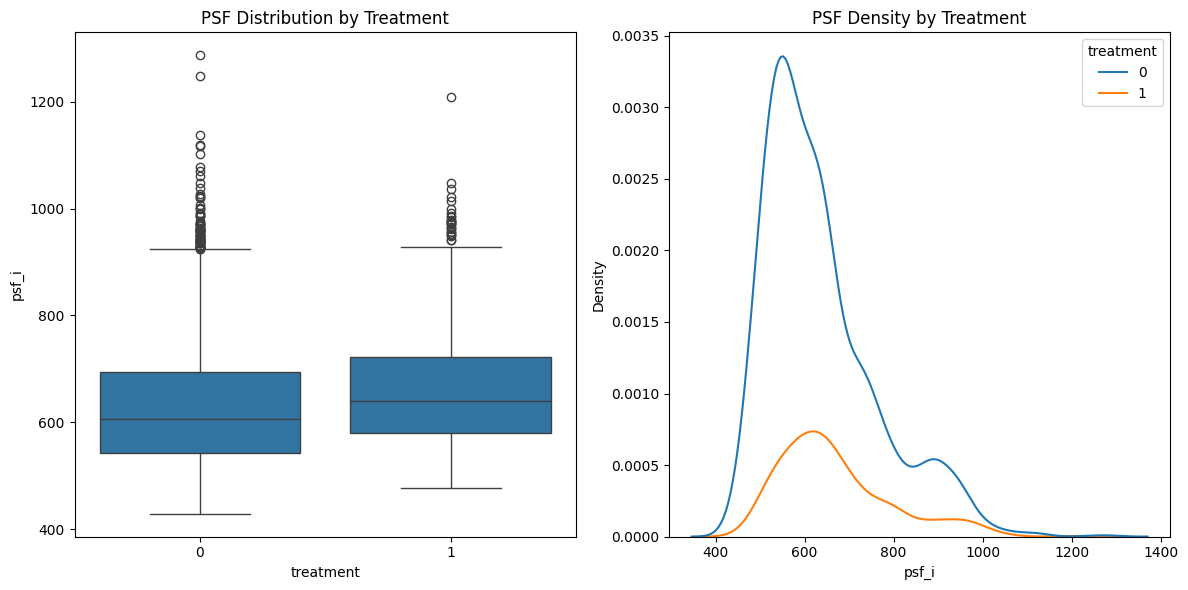

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Box plot
plt.subplot(1, 2, 1)
sns.boxplot(data=df_filtered.to_pandas(), x="treatment", y="psf_i")
plt.title("PSF Distribution by Treatment")

# Density plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=df_filtered.to_pandas(), x="psf_i", hue="treatment")
plt.title("PSF Density by Treatment")

plt.tight_layout()
plt.show()